In [ ]:
#If opening in colab run this cell
!git clone https://github.com/RubingLi123/foster_2023spring.git
%cd foster_2023spring/Homeworks

Cloning into 'foster_2023spring'...
remote: Enumerating objects: 334, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 334 (delta 87), reused 170 (delta 52), pack-reused 102
Receiving objects: 100% (334/334), 53.07 MiB | 8.57 MiB/s, done.
Resolving deltas: 100% (127/127), done.
Updating files: 100% (59/59), done.
/content/foster_2023spring/Homeworks


# Homework 1

## Part 2: Graduate admissions case study

You've been hired by Hudson University as a data analyst for the Graduate Admissions Department. Since the admission process is long and tedious, it often results in a bottleneck for other subsequent tasks, such as planning the necessary resources to accommodate the admitted students (e.g. housing, classes, etc). You have been asked to build a model to predict which students will be admitted using the following historical data: 

1. Serial No. (serves as unique identifier)
2. GRE Scores (out of 340) 
3. TOEFL Scores (out of 120) 
4. University Rating (out of 5).
5. Statement of Purpose Strength (out of 5)
6. Letter of Recommendation Strength (out of 5) 
7. Undergraduate GPA (out of 10) 
8. Research Experience (either 0 or 1) 
9. Chance of Admit (ranging from 0 to 1)

The chances of admit for the applicants in your data were assessed by an expert. Given that this list of application attributes would be available early in the admission process for future applications (except for Chance of Admit), a model predicting chances of admit would allow planning tasks to start earlier.

For the following numbered items, **follow any directions and answer any questions**.  Optional parts carry no credit, but should be helpful for your learning.

In [ ]:
# Some libraries you may need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Trick to display plots inline with the rest of your notebook.
%matplotlib inline

** 1. Load the homework data into a pandas data frame. Print the number of rows and columns in the dataset. **

In [ ]:
data_path = "./data/data-hw1.csv"
#YOUR CODE HERE
df = pd.read_csv(data_path)

(Optional) Rename the columns in the dataframe to manipulate the data more easily. This will make your life easier.  Show a few lines with the new column names.

In [ ]:
# Put your (optional) answer here.
df.columns = ['ID', 'GRE', 'TOEFL', 'Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Admit']
print(df)
# Here are some suggested column names: "ID", "GRE", "TOEFL", "Rating", "SOP", "LOR", "CGPA", "Research", "Admit"

      ID  GRE  TOEFL  Rating  SOP  LOR  CGPA  Research  Admit
0      1  337    118       4  4.5  4.5  9.65         1   0.92
1      2  324    107       4  4.0  4.5  8.87         1   0.76
2      3  316    104       3  3.0  3.5  8.00         1   0.72
3      4  322    110       3  3.5  2.5  8.67         1   0.80
4      5  314    103       2  2.0  3.0  8.21         0   0.65
..   ...  ...    ...     ...  ...  ...   ...       ...    ...
495  496  332    108       5  4.5  4.0  9.02         1   0.87
496  497  337    117       5  5.0  5.0  9.87         1   0.96
497  498  330    120       5  4.5  5.0  9.56         1   0.93
498  499  312    103       4  4.0  5.0  8.43         0   0.73
499  500  327    113       4  4.5  4.5  9.04         0   0.84

[500 rows x 9 columns]


** 2. Show descriptive statistics for all columns. **

In [ ]:
#YOUR CODE HERE
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        500 non-null    int64  
 1   GRE       500 non-null    int64  
 2   TOEFL     500 non-null    int64  
 3   Rating    500 non-null    int64  
 4   SOP       500 non-null    float64
 5   LOR       500 non-null    float64
 6   CGPA      500 non-null    float64
 7   Research  500 non-null    int64  
 8   Admit     500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


,ID,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


(Optional 2) Drop the column "Serial No". This will be helpful to visualize things later on.

In [ ]:
#YOUR CODE HERE
df.drop(['ID'], axis = 1)

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


** 3. What is the distribution of the chances of admit? Plot a histogram of this variable. **

array([[<AxesSubplot:title={'center':'Admit'}>]], dtype=object)

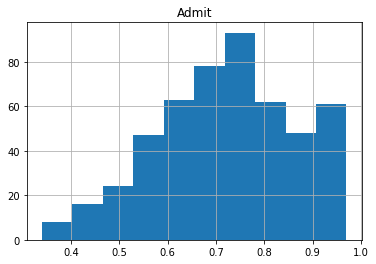

In [ ]:
#YOUR CODE HERE
df.hist('Admit')

** 4. Chances of admit seem to vary quite a bit. How much of this depends on research experience? Print the average chance of admit against research. (this can be done using a groupby) **

In [ ]:
#YOUR CODE HERE
avg_admit_by_research = df.groupby("Research")["Admit"].mean()
print(avg_admit_by_research)

Research
0    0.634909
1    0.789964
Name: Admit, dtype: float64


** 5. Does the distribution of chances of admit change with university rating? Plot a histogram of chances of admit for each university rating. (Plot 5 histograms) **

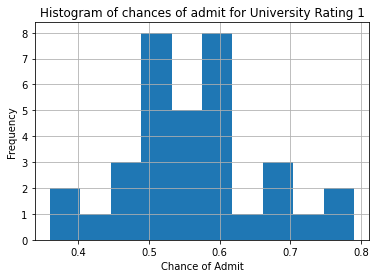

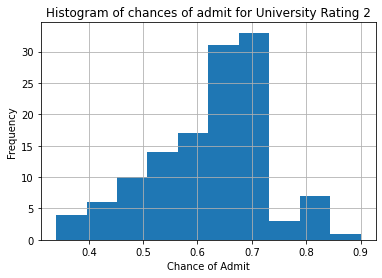

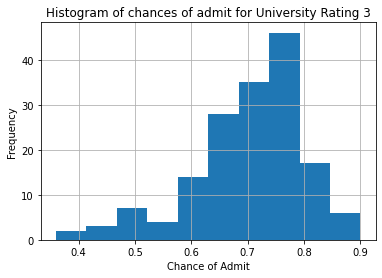

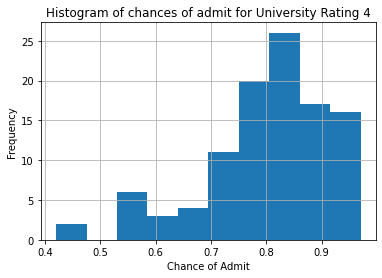

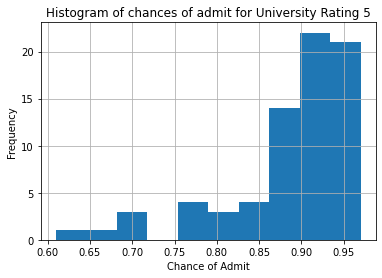

In [ ]:
#YOUR CODE HERE
for rating in range(1, 6):
    df[df["Rating"] == rating]["Admit"].hist(bins=10)
    plt.title(f"Histogram of chances of admit for University Rating {rating}")
    plt.xlabel("Chance of Admit")
    plt.ylabel("Frequency")
    plt.show()

As you can see, the distribution of chances of admit does seem to change with university rating. Higher-rated universities tend to have a higher average chance of admit, as well as a wider range of chances of admit.

** 6. Another way to look at the relationship between two variables is through scatter plots. Plot a scatter plot between TOEFL Score and chance of admit. **

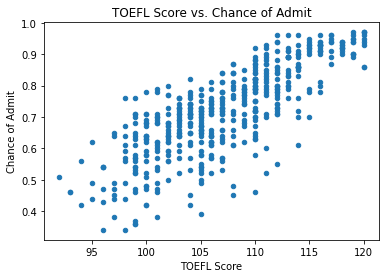

In [ ]:
#YOUR CODE HERE
df.plot.scatter(x="TOEFL", y="Admit")
plt.title("TOEFL Score vs. Chance of Admit")
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
plt.show()

** 7. Boxplots are also useful to look at the relationship between a categorical variable and a numeric variable. Plot a boxplot of chance of admit grouped by "University Rating". (check out seaborn) **

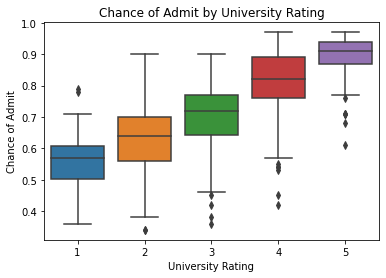

In [ ]:
#YOUR CODE HERE
sns.boxplot(x="Rating", y="Admit", data=df)
plt.title("Chance of Admit by University Rating")
plt.xlabel("University Rating")
plt.ylabel("Chance of Admit")
plt.show()

** 8. Very often it is useful to quantify how strong is the relationship between different variables. For example, measures of correlation, such as Pearson's correlation coefficient, can show whether one numeric variable gives information on another numeric variable. Pandas allows us to compute the Pearson correlation coefficient between all pairs of columns in our dataframe. Display the correlations between all pairs of columns. **

In [ ]:
#YOUR CODE HERE
corr = df.corr()
print(corr)

                ID       GRE     TOEFL    Rating       SOP       LOR  \
ID        1.000000 -0.103839 -0.141696 -0.067641 -0.137352 -0.003694   
GRE      -0.103839  1.000000  0.827200  0.635376  0.613498  0.524679   
TOEFL    -0.141696  0.827200  1.000000  0.649799  0.644410  0.541563   
Rating   -0.067641  0.635376  0.649799  1.000000  0.728024  0.608651   
SOP      -0.137352  0.613498  0.644410  0.728024  1.000000  0.663707   
LOR      -0.003694  0.524679  0.541563  0.608651  0.663707  1.000000   
CGPA     -0.074289  0.825878  0.810574  0.705254  0.712154  0.637469   
Research -0.005332  0.563398  0.467012  0.427047  0.408116  0.372526   
Admit     0.008505  0.810351  0.792228  0.690132  0.684137  0.645365   

              CGPA  Research     Admit  
ID       -0.074289 -0.005332  0.008505  
GRE       0.825878  0.563398  0.810351  
TOEFL     0.810574  0.467012  0.792228  
Rating    0.705254  0.427047  0.690132  
SOP       0.712154  0.408116  0.684137  
LOR       0.637469  0.372526  0.6

** 9. Heatmaps are a tool for conveniently visualizing correlation data. Plot these correlations as a seaborn heatmap. Which pairs of variables are most closely correlated? Which variable gives the most information on chance of admit? **

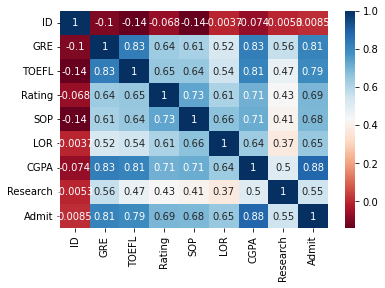

In [ ]:
#YOUR CODE HERE
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.show()

MOST CORRELATED PAIRS:

GRE is most correlated with TOEFL and CGPA (0.83)
TOEFL is most correlated with GRE (0.83)
Rating is most correlated with SOP (0.73)
LOR is most correlated with SOP (0.66)
Research is most correlated with GRE (0.56)
Among the other attributes CGPA is most correlated with GRE (0.83)


Here, Admit is the target variable, and CGPA is most closely correlated to that, so it gives most information avout chances of admit.


** 10. Build a linear model to predict the chance of admit using the application info available. Generate predictions and compare predicted quantity to the actual value in a scatter plot. ** Recommendation: try this before Class 2.  We will start on the details of predictive modeling in Class 2, so having tried it first will give you better context for the class.  You can refer to the predictive modeling code at the end of the (Dealing with Data) notebook from the first class.

Mean absolute error: 0.043258852595452826


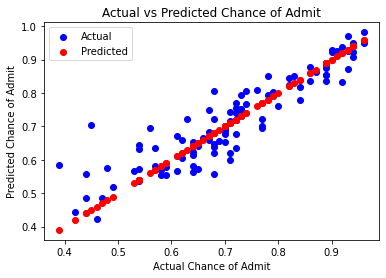

In [ ]:
#YOUR CODE HERE

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Define the predictor variables and the target variable
X = df.drop(["Admit"], axis=1)
y = df["Admit"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_hat = model.predict(X_test)

# Calculate the mean absolute error to evaluate the model's performance
loss = mean_absolute_error(y_test, y_hat)
print("Mean absolute error:", loss)

# Create a scatter plot to compare the actual and predicted values
plt.scatter(y_test, y_hat, c='blue', label='Actual')
plt.scatter(y_test, y_test, c='red', label='Predicted')
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted Chance of Admit")
plt.legend()
plt.show()


** 11. (Optional) There are many different types of predictive models, each with their own plusses and minuses. For this task, repeat your modeling performed in last question, but using a sklearn.ensemble.RandomForestRegressor. How does the scatter plot compare with the prior results? **

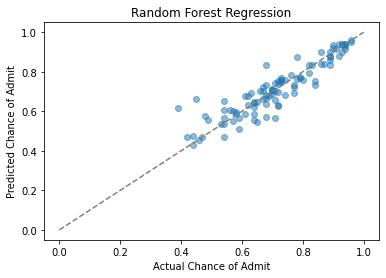

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Admit', axis=1), df['Admit'], test_size=0.2, random_state=42)

# train the random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# make predictions on the test set
y_pred = rf.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Random Forest Regression')
plt.show()